<a href="https://colab.research.google.com/github/tayyabijaz/DataScience/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score


## reading files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [9]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [10]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,Investment,Perovo,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,no,0,2,7,yes,no,yes,yes,no,no,no,...,37,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,...,1,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,9,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1


In [0]:
#### Preprocessing This step involves imputing all missing values and label encoding of all categorical variables.####

## missing values
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))


for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))

## label encoding
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')


In [0]:
## creating a new feature origin
train['origin'] = 0
test['origin'] = 1
training = train.drop('price_doc',axis=1) #droping target variable

In [0]:
## taking sample from training and test data
training = training.sample(7662, random_state=12)
testing = test.sample(7000, random_state=11)


In [0]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)

In [15]:
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combi.columns:
  score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=2,scoring='roc_auc')
  #The value of AUC-ROC for a particular feature is greater than 0.80, we classify that feature as drifting.
  if (np.mean(score) > 0.8):
    drop_list.append(i)
  print(i,np.mean(score))

id 1.0
timestamp 0.9598703993735317
full_sq 0.7294637543349367
life_sq 0.8676376552187044
floor 0.5141672446582393
max_floor 0.6762523212887348
material 0.6692621844352463
build_year 0.8011087556400791
num_room 0.6620606704702241
kitch_sq 0.8928003505239215
state 0.7654533877764105
product_type 0.5084359175150093
sub_area 0.6781820673453405
area_m 0.5989405787373681
raion_popul 0.5994519334750344
green_zone_part 0.603518905917888
indust_part 0.5947047208860052
children_preschool 0.5977586046164747
preschool_quota 0.7322804191371145
preschool_education_centers_raion 0.5092503822202333
children_school 0.592899634560167
school_quota 0.7346830555244808
school_education_centers_raion 0.5275441324532946
school_education_centers_top_20_raion 0.5014311444233135
hospital_beds_raion 0.8838622888466272
healthcare_centers_raion 0.5279273781556476
university_top_20_raion 0.5004552336204646
sport_objects_raion 0.539635790729761
additional_education_raion 0.5393708654957676
culture_objects_top_25 0.5

In [16]:
#Here I have classified seven features as drifting. 
 drop_list

['id',
 'timestamp',
 'life_sq',
 'build_year',
 'kitch_sq',
 'hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500']

Below Histogram shows the one Material Variable and we can see the shift/drifting. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


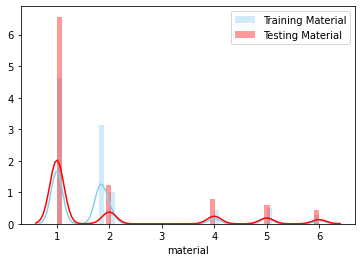

In [17]:
# Import library
import seaborn as sns


 
# Method 1: on the same Axis
sns.distplot( training["material"] , color="skyblue", label="Training Material")
sns.distplot( testing["material"] , color="red", label="Testing Material")
plt.legend()
plt.show()


In [0]:
#Above graph shows that we have drift in the data
#We will Train our model with drift to check accuracy 

## taking sample from training and test data
train_with_drift = train.sample(7662, random_state=12)
test_with_drift = test.sample(7000, random_state=11)
# Labels are the values we want to predict
labels = np.array(train_with_drift['price_doc'])
# Remove the labels from the features
# axis 1 refers to the columns
train_with_drift= train_with_drift.drop('price_doc', axis = 1)
# Saving feature names for later use
train_with_drift_list = list(train_with_drift.columns)
# Convert to numpy array
train_with_drift = np.array(train_with_drift)

In [0]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(train_with_drift, labels, test_size = 0.25, random_state = 42)
# Instantiate model with 200 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [20]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 56.85 %.


Remove the drifting by dropping some features


In [0]:
##Now we will remove the drifft by dropping some of the features from 
## dropping drifting features which are not important.
drift_train = training.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)
drift_test = testing.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)


In [0]:
# Split the data into training and testing sets
drift_train_features, drift_test_features, drift_train_labels, drift_test_labels = train_test_split(drift_train, labels, test_size = 0.25, random_state = 42)
# Instantiate model with 200 decision trees
drf = RandomForestRegressor(n_estimators = 100, random_state = 10)
# Train the model on training data
drf.fit(drift_train_features, drift_train_labels);

In [32]:
# Use the forest's predict method on the test data
drf_predictions = drf.predict(drift_test_features)
# Calculate the absolute errors
drf_errors = abs(drf_predictions - drift_test_labels)
# Calculate mean absolute percentage error (MAPE)
drf_mape = 100 * (drf_errors / drift_test_labels)
# Calculate and display accuracy
drf_accuracy = 100 - np.mean(drf_mape)
print('After Drift Accuracy:', round(drf_accuracy, 2), '%.')

After Drift Accuracy: 56.95 %.
